## ⚽ UEFA Insights – 3. Most Efficient Teams (Shots on Target per Shot Attempt)

**Main Goal** To create visualizations that showcase the teams with the highest efficiency in converting shot attempts into shots on target during the UEFA Championship stages for the 2020, 2021, and 2022 seasons.

**Data source:** UEFA match data provided in DataCamp's Data Sources repository for DataLab projects hosted on Snowflake.

### Dataset Overview 
Quick overview of a dataset for UEFA season 2020, `SOCCER.TBL_UEFA_2020`


In [1]:
-- Explore the data in the table
SELECT *
FROM SOCCER.TBL_UEFA_2020
LIMIT 5

,STAGE,DATE,PENS,PENS_HOME_SCORE,PENS_AWAY_SCORE,TEAM_NAME_HOME,TEAM_NAME_AWAY,TEAM_HOME_SCORE,TEAM_AWAY_SCORE,POSSESSION_HOME,POSSESSION_AWAY,TOTAL_SHOTS_HOME,TOTAL_SHOTS_AWAY,SHOTS_ON_TARGET_HOME,SHOTS_ON_TARGET_AWAY,DUELS_WON_HOME,DUELS_WON_AWAY,PREDICTION_TEAM_HOME_WIN,PREDICTION_DRAW,PREDICTION_TEAM_AWAY_WIN,LOCATION
0,Final,2021-05-29,FALSE,FALSE,FALSE,Manchester City,Chelsea,0,1,0.61,0.39,7,8,1,2,0.50,0.50,0.55,0.03,0.42,EstÃ¡dio Do DragÃ£o
1,Final,2021-05-29,FALSE,FALSE,FALSE,Manchester City,Chelsea,0,1,0.61,0.39,7,8,1,2,0.50,0.50,0.55,0.03,0.42,EstÃ¡dio Do DragÃ£o
2,Semi-finals second leg,2021-05-05,FALSE,FALSE,FALSE,Chelsea,Real Madrid,2,0,0.32,0.68,15,7,5,5,0.52,0.49,0.43,0.03,0.54,Stamford Bridge
3,Semi-finals second leg,2021-05-04,FALSE,FALSE,FALSE,Manchester City,PSG,2,0,0.44,0.56,12,14,5,0,0.53,0.47,0.44,0.03,0.53,Etihad Stadium
4,Semi-finals first leg,2021-04-28,FALSE,FALSE,FALSE,PSG,Manchester City,1,2,0.40,0.60,10,11,4,6,0.47,0.53,0.65,0.04,0.31,Parc des Princes


### SQL Query Setup
- The query combines match data from three different tables (2020, 2021, 2022) into a single dataset.
- It calculates the total number of shots and shots on target for each team, both home and away.
- Finally, it computes the shooting efficiency for each team and orders the results by efficiency in descending order.
- Output is saved in a data frame `shooting_efficiency_per_team` for later visualization.

In [2]:
WITH all_matches AS (
    SELECT * FROM SOCCER.TBL_UEFA_2020
    UNION ALL
    SELECT * FROM SOCCER.TBL_UEFA_2021
    UNION ALL
    SELECT * FROM SOCCER.TBL_UEFA_2022
),
all_shots AS (
    SELECT 
        TEAM_NAME_HOME AS TEAM, 
        TOTAL_SHOTS_HOME AS SHOTS,
        SHOTS_ON_TARGET_HOME AS TARGETS
    FROM all_matches

    UNION ALL

    SELECT 
        TEAM_NAME_AWAY AS TEAM, 
        TOTAL_SHOTS_AWAY AS SHOTS,
        SHOTS_ON_TARGET_AWAY AS TARGETS
    FROM all_matches
),
team_total_shots AS (
    SELECT 
        TEAM,
        SUM(SHOTS) AS TOTAL_SHOTS,
        SUM(TARGETS) AS TOTAL_TARGETS
    FROM all_shots
    GROUP BY TEAM
)
SELECT
    TEAM,
    TOTAL_TARGETS,
    TOTAL_SHOTS,
    ROUND(TOTAL_TARGETS / NULLIF(TOTAL_SHOTS, 0), 3) AS EFFICIENCY
FROM team_total_shots
ORDER BY EFFICIENCY DESC;

,TEAM,TOTAL_TARGETS,TOTAL_SHOTS,EFFICIENCY
0,Laipzig,8,7,1.143
1,Real Madrid\n,6,9,0.667
2,Inter,4,7,0.571
3,Dynamo Kyiv,22,44,0.500
4,Benfica\n,4,8,0.500
...,...,...,...,...
103,Dynamo Hyiv,3,27,0.111
104,Benefica,3,28,0.107
105,Sheriff,2,25,0.080
106,Benefics,1,32,0.031


### Visualization Setup
**Data Source:** Data frame `shooting_efficiency_per_team` generated by a SQL query.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Frame Preview 
Quick preview of a data frame `shooting_efficiency_per_team` obtained as a result of the SQL query execution.

In [4]:
shooting_efficiency_per_team.sort_values('EFFICIENCY', ascending = False).head()

,TEAM,TOTAL_TARGETS,TOTAL_SHOTS,EFFICIENCY
0,Laipzig,8,7,1.143
1,Real Madrid\n,6,9,0.667
2,Inter,4,7,0.571
3,Dynamo Kyiv,22,44,0.500
4,Benfica\n,4,8,0.500


### Potential Data Discrepancies
Upon reviewing the query output, an anomaly was detected in the computed metric 'EFFICIENCY', necessitating further examination...

In [5]:
# Analyze the 'EFFICIENCY' column to check for values above 1.0
anomalies = shooting_efficiency_per_team[shooting_efficiency_per_team['EFFICIENCY'] > 1.0]

# Display the rows where 'EFFICIENCY' is above 1.0
anomalies

,TEAM,TOTAL_TARGETS,TOTAL_SHOTS,EFFICIENCY
0,Laipzig,8,7,1.143


### Anomaly Analysis
- 'EFFICIENCY' is calculated as TOTAL_TARGETS / TOTAL_SHOTS.
- Since TOTAL_TARGETS cannot exceed TOTAL_SHOTS, 'EFFICIENCY' should not logically be above 1.0.
- If there are any values above 1.0, they are likely due to data errors and should be reviewed or corrected.

In [6]:
# Correct the anomalies by setting 'EFFICIENCY' to NaN
shooting_efficiency_per_team.loc[shooting_efficiency_per_team['EFFICIENCY'] > 1.0, 'EFFICIENCY'] = float('nan')

# Display the corrected data frame
shooting_efficiency_per_team.sort_values('EFFICIENCY', ascending = False).head()

,TEAM,TOTAL_TARGETS,TOTAL_SHOTS,EFFICIENCY
1,Real Madrid\n,6,9,0.667
2,Inter,4,7,0.571
3,Dynamo Kyiv,22,44,0.500
4,Benfica\n,4,8,0.500
5,Salzburg\n,8,17,0.471


### Anomaly Correction
- By setting 'EFFICIENCY' to NaN for values above 1.0, we effectively mark these entries as invalid or erroneous.
- This allows for easy identification and handling of these anomalies in subsequent data processing steps.
- Using NaN ensures that these values are excluded from calculations and analyses, preventing them from skewing results.

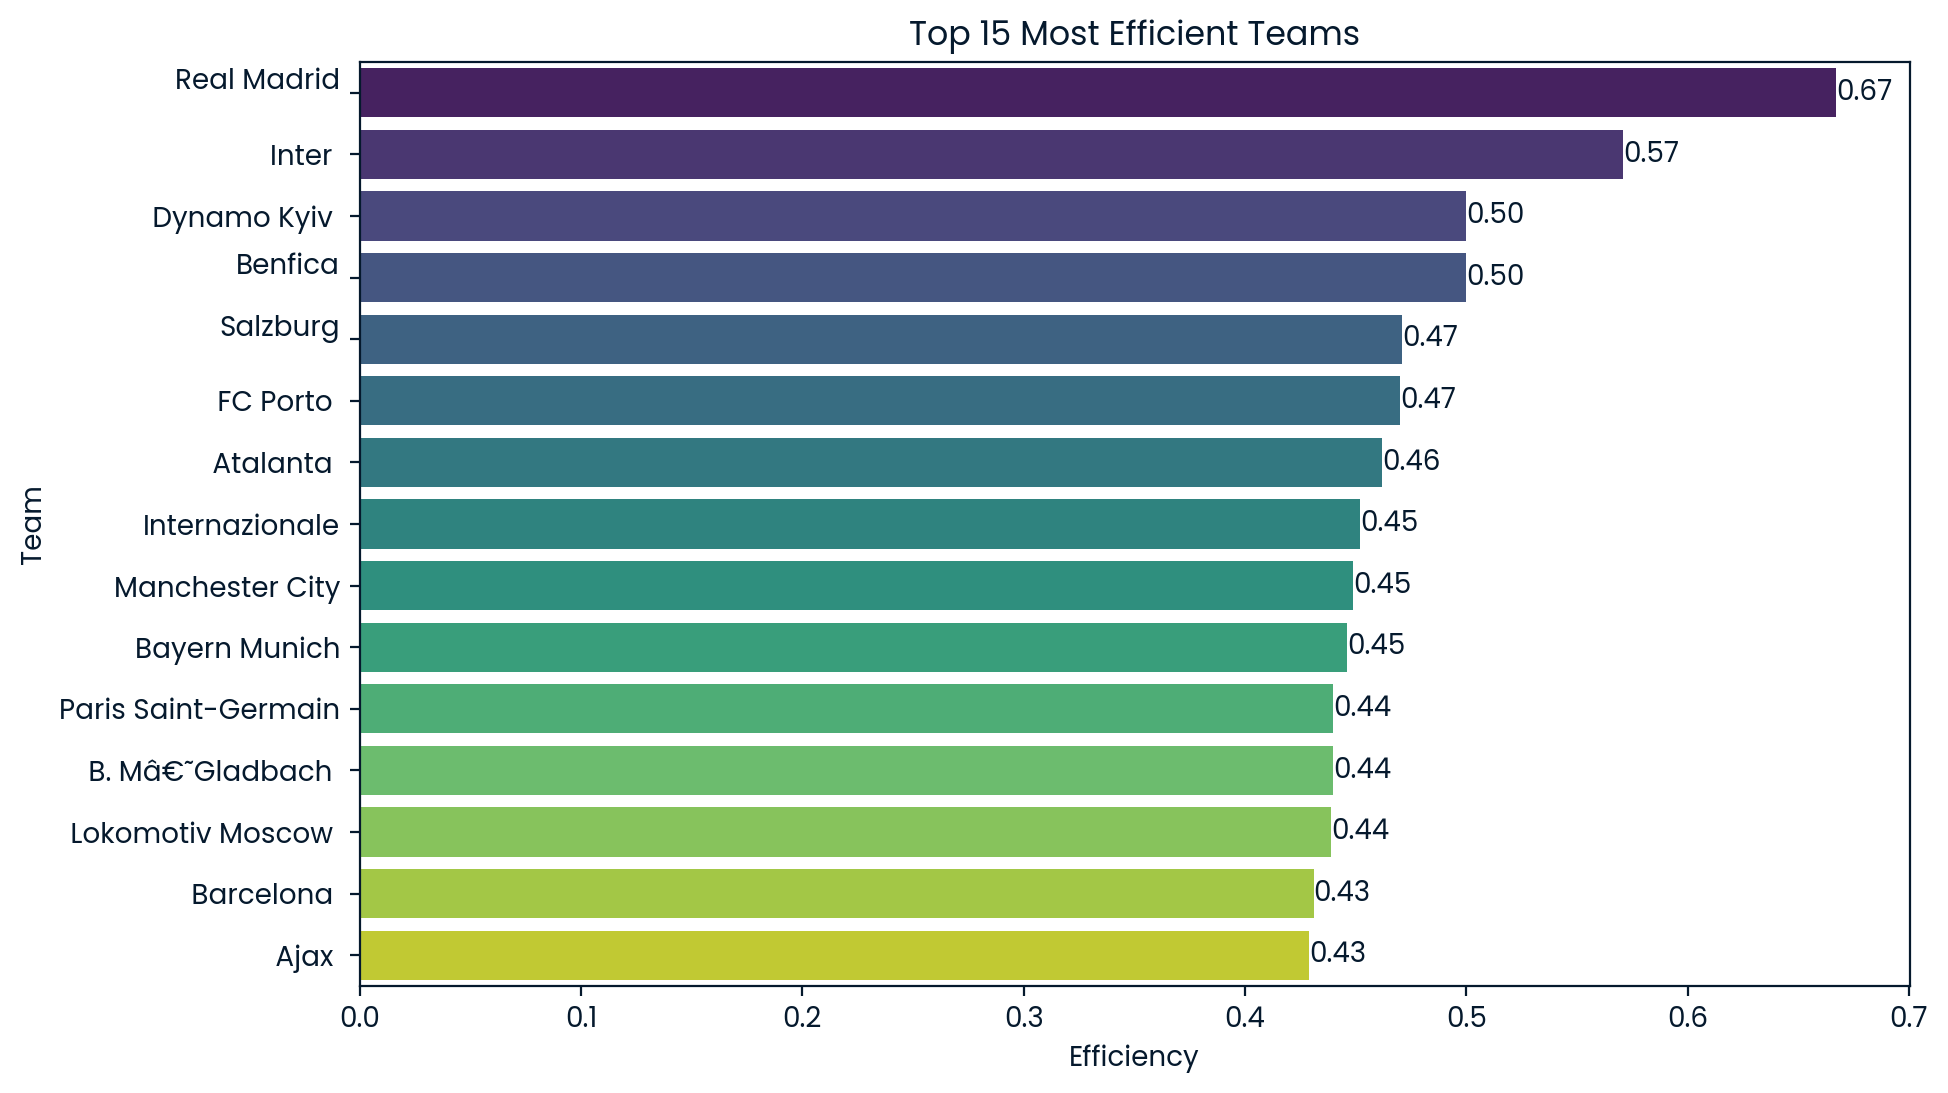

In [7]:
# Sort the data by 'EFFICIENCY' in descending order and select the top 15 teams
top_15_teams = shooting_efficiency_per_team.sort_values('EFFICIENCY', ascending = False).head(15)

# Create the horizontal bar chart
plt.figure(figsize = (10, 6))
barplot = sns.barplot(
    x = 'EFFICIENCY', 
    y = 'TEAM', 
    data = top_15_teams, 
    palette = 'viridis'
)

# Add titles and labels
plt.title('Top 15 Most Efficient Teams', fontsize = 12)
plt.xlabel('Efficiency')
plt.ylabel('Team')

# Label efficiency values on bars
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f')

plt.show()

### Insight Reflection

#### Most Common Outcome
The most common outcome observed is that teams with higher shooting efficiency tend to have a balanced number of total targets and shots. This suggests that these teams are not only creating opportunities but are also effective in converting these opportunities into successful shots.

#### Unexpected Pattern
An unexpected pattern in the data is the presence of anomalies where some teams have an efficiency greater than 1.0, which is theoretically impossible. This indicates potential data entry errors or miscalculations in the dataset.

#### Real-World Meaning
High efficiency indicates a team's ability to convert opportunities into goals, which is crucial for winning matches. This insights can help coaches and analysts identify strengths and weaknesses in a team's offensive strategy, allowing them to make informed decisions to improve performance.